In [25]:
pip install mplfinance

[*********************100%%**********************]  1 of 1 completed


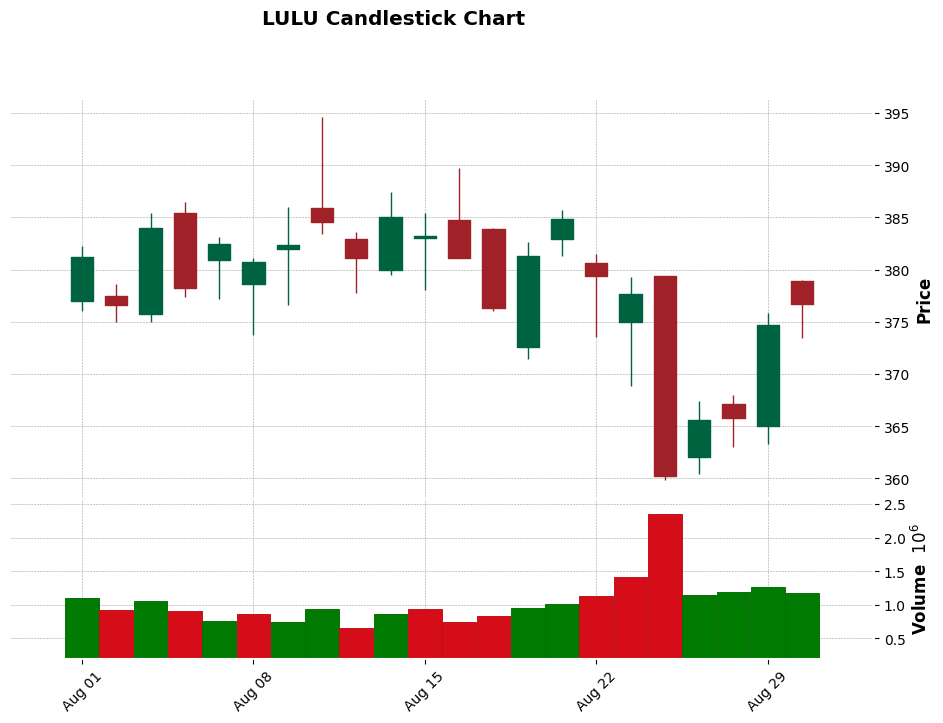

In [26]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = "LULU"
start_date = "2023-08-01"
end_date = "2023-08-31"

# Fetch stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Create a candlestick chart
mpf.plot(stock_data, type='candle', style='charles', title=f'{stock_symbol} Candlestick Chart',
         ylabel='Price', volume=True, figsize=(12, 8))

# Display the candlestick chart
plt.show()

[*********************100%%**********************]  1 of 1 completed


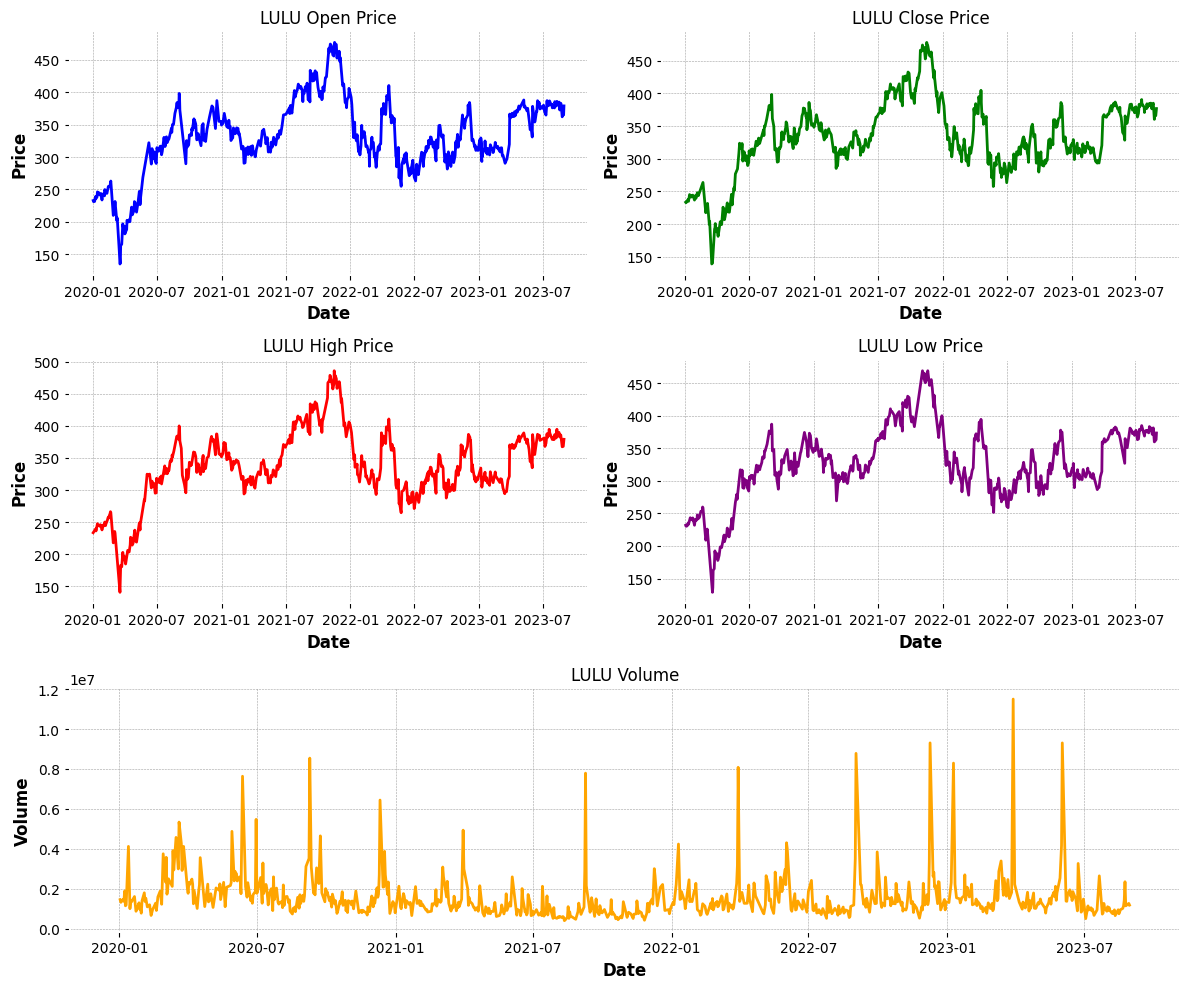

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = "LULU"
start_date = "2020-01-01"
end_date = "2023-08-31"

# Fetch stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Create individual plots for Open, Close, High, Low, and Volume
plt.figure(figsize=(12, 10))

# Plot Open Price
plt.subplot(3, 2, 1)
plt.plot(stock_data.index, stock_data['Open'], color='blue')
plt.title(f'{stock_symbol} Open Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot Close Price
plt.subplot(3, 2, 2)
plt.plot(stock_data.index, stock_data['Close'], color='green')
plt.title(f'{stock_symbol} Close Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot High Price
plt.subplot(3, 2, 3)
plt.plot(stock_data.index, stock_data['High'], color='red')
plt.title(f'{stock_symbol} High Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot Low Price
plt.subplot(3, 2, 4)
plt.plot(stock_data.index, stock_data['Low'], color='purple')
plt.title(f'{stock_symbol} Low Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot Volume
plt.subplot(3, 1, 3)
plt.plot(stock_data.index, stock_data['Volume'], color='orange')
plt.title(f'{stock_symbol} Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

# Adjust layout and display
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-28-f4ada4bba6eb>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stock_data['Adj Close'], label='LULU', shade=True)
<ipython-input-28-f4ada4bba6eb>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(competitor_data[competitor_ticker], label=competitor_ticker, shade=True)
<ipython-input-28-f4ada4bba6eb>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(competitor_data[competitor_ticker], label=competitor_ticker, shade=True)


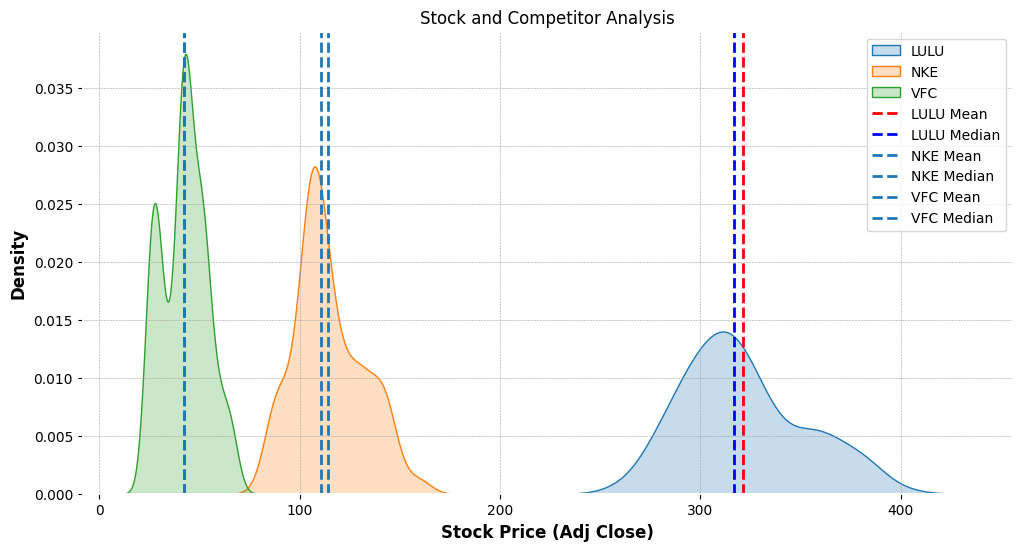

Summary Statistics for LULU:
count    251.000000
mean     321.151753
std       30.335201
min      257.510010
25%      298.910004
50%      316.739990
75%      337.960007
max      404.660004
Name: Adj Close, dtype: float64

Summary Statistics for Competitors:
              NKE         VFC
count  251.000000  251.000000
mean   114.409749   42.411636
std     17.082541   11.159407
min     81.808212   23.973621
25%    103.943268   31.410247
50%    110.633827   42.533966
75%    126.008595   50.958927
max    162.520569   68.675682


In [28]:
# Install necessary libraries (if not already installed)
!pip install yfinance pandas matplotlib seaborn

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate summary statistics and plot kernel density
def analyze_stock(stock_data, competitor_data, title):
    # Summary statistics
    stock_stats = stock_data['Adj Close'].describe()
    competitor_stats = competitor_data.describe()

    # Plot kernel density
    plt.figure(figsize=(12, 6))
    sns.kdeplot(stock_data['Adj Close'], label='LULU', shade=True)
    for competitor_ticker in competitor_data.columns:
        sns.kdeplot(competitor_data[competitor_ticker], label=competitor_ticker, shade=True)

    # Mark mean and median with vertical lines
    plt.axvline(stock_stats['mean'], color='red', linestyle='dashed', linewidth=2, label='LULU Mean')
    plt.axvline(stock_stats['50%'], color='blue', linestyle='dashed', linewidth=2, label='LULU Median')

    for competitor_ticker in competitor_data.columns:
        plt.axvline(competitor_stats[competitor_ticker]['mean'], linestyle='dashed', linewidth=2, label=f'{competitor_ticker} Mean')
        plt.axvline(competitor_stats[competitor_ticker]['50%'], linestyle='dashed', linewidth=2, label=f'{competitor_ticker} Median')

    plt.title(title)
    plt.xlabel('Stock Price (Adj Close)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Display summary statistics
    print("Summary Statistics for LULU:")
    print(stock_stats)
    print("\nSummary Statistics for Competitors:")
    print(competitor_stats)

# Define stock and competitor tickers
lulu_ticker = 'LULU'
competitor_tickers = ['NKE', 'VFC']  # Nike and North Face

# Define the training period
start_date = '2022-01-01'
end_date = '2023-01-01'

# Fetch stock data
lulu_data = fetch_stock_data(lulu_ticker, start_date, end_date)

# Fetch competitor data
competitor_data = pd.DataFrame()
for competitor_ticker in competitor_tickers:
    competitor_data[competitor_ticker] = yf.download(competitor_ticker, start=start_date, end=end_date)['Adj Close']

# Analyze and visualize data
analyze_stock(lulu_data, competitor_data, 'Stock and Competitor Analysis')


In [29]:
%pip install ta
%pip install getFamaFrenchFactors

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import getFamaFrenchFactors as gff
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Define the ticker symbol for Tesla
ticker = 'LULU'

# Define the start and end dates for the data
start_date = '2019-01-01'
end_date = '2022-01-01'

# Download the data from Yahoo Finance
lulu = yf.download(ticker, start=start_date, end=end_date)


# Import ADS_INDEX
from datetime import datetime
date_parser = lambda x: datetime.strptime(x, '%Y:%m:%d')
ads_data = pd.read_excel("ads_index_010622.xlsx", parse_dates=['Date'], date_parser=date_parser)
new_ads_data = ads_data[['Date', 'ADS_INDEX_010622']].set_index('Date')

# Calculate OBV
lulu['daily_return'] = lulu['Adj Close'].pct_change()
lulu['direction'] = np.where(lulu['daily_return'] >= 0, 1, -1)
lulu['direction'][0] = 0
lulu['vol_adjusted'] = lulu['Volume'] * lulu['direction']
lulu['OBV'] = lulu['vol_adjusted'].cumsum()


nke = yf.download('NKE', start=start_date, end=end_date)
ads = yf.download('ADS', start=start_date, end=end_date)
uaa = yf.download('UAA', start=start_date, end=end_date)
puma = yf.download('PUMA', start=start_date, end=end_date)
gps = yf.download('GPS', start=start_date, end=end_date)
vfc = yf.download('VFC', start=start_date, end=end_date)
colm = yf.download('COLM', start=start_date, end=end_date)
asccf = yf.download('ASCCF', start=start_date, end=end_date)
#ltc = yf.download('LTC-USD', start=start_date, end=end_date)
#ada = yf.download('ADA-USD', start=start_date, end=end_date)
#vix = yf.download('^VIX', start=start_date, end=end_date)

# Calculate additional features
lulu['mom_5_20'] = (lulu['Close'] / lulu['Close'].shift(5)) - 1
lulu['mom_20_100'] = (lulu['Close'] / lulu['Close'].shift(20)) - 1
lulu['mom_60_200'] = (lulu['Close'] / lulu['Close'].shift(60)) - 1

bkcn_df = yf.download("BKCN", start_date, end_date)
shsz300_df = yf.download("000300.SS", start_date, end_date)
rsi_indicator = RSIIndicator(close=lulu['Adj Close'], window=14)
macd_indicator = MACD(close=lulu['Adj Close'])

lulu['rsi'] = rsi_indicator.rsi()
lulu['macd'] = macd_indicator.macd()

print(shsz300_df.head())
print(bkcn_df.head())

# Calculate Fama French 3 factors
ff_data = gff.famaFrench3Factor(frequency='m')
ff_data.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff_data.set_index('Date',inplace=True)
ff_data = ff_data.resample('D').interpolate()




# Reset index and convert all dates to same timezones, so they become mergable
for x in [nke,ads,uaa,puma,lulu,gps,vfc,colm,asccf,ff_data,new_ads_data,shsz300_df,bkcn_df]:
    x.reset_index(inplace=True)
    x['Date'] =  pd.to_datetime(x['Date']).dt.date

lulu = ff_data.merge(lulu,on='Date')
lulu = new_ads_data.merge(lulu,on='Date')

## CORRECTION - Need to merge FF data according to date here

df_regressor = pd.DataFrame({
    'NKE_Adj_Close':nke['Adj Close'].shift(1),
    'ADS_Adj_Close':ads['Adj Close'].shift(1),
    'UAA_Adj_Close':uaa['Adj Close'].shift(1),
    'PUMA_Adj_Close':puma['Adj Close'].shift(1),
    'GPS_Adj_Close':gps['Adj Close'].shift(1),
    'VFC_Adj_Close':vfc['Adj Close'].shift(1),
    'COLM_Adj_Close':colm['Adj Close'].shift(1),
    'ASCCF_Adj_Close':asccf['Adj Close'].shift(1),
    'Fama_French_Mkt_RF':lulu['Mkt-RF'].shift(1),
    'Fama_French_SMB' : lulu['SMB'].shift(1),
    'Fama_French_HML' : lulu['HML'].shift(1),
    'OBV': lulu['OBV'].shift(1),
    'mom_5_20':  lulu['mom_5_20'].shift(1),
    'mom_20_100':  lulu['mom_20_100'].shift(1),
    'mom_60_200':  lulu['mom_60_200'].shift(1),
    'LULU_CLOSE': lulu['Adj Close'],
    'avg_close_20_days_': lulu['Adj Close'].rolling(window=20).mean().shift(1),
    'avg_Close_50_days':lulu['Adj Close'].rolling(window=50).mean().shift(1),
    'ADS_INDEX': lulu['ADS_INDEX_010622'].shift(1),
#     'bkcn_Adj_Close':bkcn_df['Adj Close'].shift(1),
    'shsz300_df':shsz300_df['Adj Close'].shift(1),

    'LULU_RSI': lulu['rsi'].shift(1),
    'LULU_MACD':lulu['macd'].shift(1)
})

# Remove any rows with missing data
df_regressor.dropna(inplace=True)
print(df_regressor.head)
print(df_regressor.shape)




scaler = StandardScaler()
X = scaler.fit_transform(df_regressor)
# Split the data into features (X) and target (y)
y = df_regressor['LULU_CLOSE']
df_regressor = df_regressor.drop(columns=['LULU_CLOSE'],axis=1)
X = df_regressor
# Fit a decision tree model to the data
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X, y)

# Select the top 10 most important features
selector_Decision_Trees = SelectFromModel(tree, prefit=True, threshold=-np.inf, max_features=10)
selected_features = X.columns[selector_Decision_Trees.get_support()]

final_feature_set = set()
# Print the top 10 most important features
print('Top 10 most important features through Decision Trees:')
for feature in selected_features:
    print(feature)





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-30-0c878b87b4e2>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lulu['direction'][0] = 0
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKCN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-03-11  5024.560059  5138.410156  5020.580078  5128.220215  5128.220215   
2021-03-12  5153.669922  5153.669922  5086.819824  5146.379883  5146.379883   
2021-03-15  5116.120117  5120.879883  4992.399902  5035.540039  5035.540039   
2021-03-16  5054.410156  5084.310059  5009.950195  5079.359863  5079.359863   
2021-03-17  5062.770020  5123.549805  5020.129883  5100.859863  5100.859863   

            Volume  
Date                
2021-03-11  189600  
2021-03-12  201000  
2021-03-15  204200  
2021-03-16  161400  
2021-03-17  149200  
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
<bound method NDFrame.head of Empty DataFrame
Columns: [NKE_Adj_Close, ADS_Adj_Close, UAA_Adj_Close, PUMA_Adj_Close, GPS_Adj_Close, VFC_Adj_Close, COL

ValueError: ignored

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

# Select the top 10 most important features
selector_RIDGE = SelectFromModel(ridge, prefit=True, threshold=-np.inf, max_features=10)
selected_features = X.columns[selector_RIDGE.get_support()]

# Print the top 10 most important features
print('Top 10 most important features (Ridge Regression):')
for feature in selected_features:
      print('-', feature)



In [ ]:
# Fit a LassoLarsCV model to the data
lars = LassoLarsCV(cv=5).fit(X, y)

# Select the top 10 most important features
selector_LARS = SelectFromModel(lars, prefit=True, threshold=-np.inf, max_features=10)
selected_features_LARS = X.columns[selector_LARS.get_support()]

# Print the top 10 most important features
print('Top 10 most important features (LARS):')
for feature in selected_features_LARS:
      print('-', feature)

In [ ]:
# Fit a RandomForest model to the data
rf = RandomForestRegressor(random_state=0, n_estimators=100).fit(X, y)

# Select the top 10 most important features
selector_RF = SelectFromModel(rf, prefit=True, threshold=-np.inf, max_features=10)
selected_features = X.columns[selector_RF.get_support()]
# selector.estimator.columns
# selector.threshold_

# Print the top 10 most important features
print('Top 10 most important features (RandomForest):')
for feature in selected_features:
    print('-', feature)

In [ ]:
# Fit an XGBoost model to the data
xgb_model = xgb.XGBRegressor(random_state=0, n_estimators=100).fit(X, y)

# Select the top 10 most important features
selector_XGB = SelectFromModel(xgb_model, prefit=True, threshold=-np.inf, max_features=10)
selected_features = X.columns[selector_XGB.get_support()]

# Print the top 10 most important features
print('Top 10 most important features (XGBoost):')
for feature in selected_features:
    print('-', feature)

In [ ]:
def plot_features_with_importance(title,selector,n=10):
    features_with_importance = sorted(list(zip(selector.estimator.feature_names_in_,selector.estimator.feature_importances_)),key = lambda x: x[1],reverse=True)
    features_with_importance = features_with_importance[:n]
    for f_name,f_imp in features_with_importance[:3]:
        final_feature_set.add(f_name)
    df = pd.DataFrame(data={"Feature Name":[x[0] for x in features_with_importance],"Coefficient / Importance":[x[1] for x in features_with_importance]},columns=["Feature Name","Coefficient / Importance"])
    plt.figure(figsize = ( 20 , 10 ))
    sns.barplot(x=df['Feature Name'],y=df["Coefficient / Importance"])
    # Set title for figure
    plt.title( title , size = 24 )
    # Display figure
    plt.show()

In [ ]:
plot_features_with_importance("XG Boost Feature importance",selector_XGB,10)

In [ ]:
def plot_features_with_importance_Regressions(title,selector,n=10):
    features_with_importance = sorted(list(zip(X.columns,selector.estimator.coef_)),key = lambda x: x[1],reverse=True)
    features_with_importance = features_with_importance[:n]
    for f_name,f_imp in features_with_importance[:3]:
        final_feature_set.add(f_name)
    df = pd.DataFrame(data={"Feature Name":[x[0] for x in features_with_importance],"Coefficient / Importance":[x[1] for x in features_with_importance]},columns=["Feature Name","Coefficient / Importance"])
    plt.figure(figsize = ( 20 , 10 ))
    sns.barplot(x=df['Feature Name'],y=df["Coefficient / Importance"])
    # Set title for figure
    plt.title( title , size = 24 )
    # Display figure
    plt.show()

In [ ]:
def plot_features_with_importance_Random_forest(title,selector,n=10):
    features_with_importance = sorted(list(zip(X.columns,selector.estimator.feature_importances_)),key = lambda x: x[1],reverse=True)
    features_with_importance = features_with_importance[:n]
    for f_name,f_imp in features_with_importance[:3]:
        final_feature_set.add(f_name)
    df = pd.DataFrame(data={"Feature Name":[x[0] for x in features_with_importance],"Coefficient / Importance":[x[1] for x in features_with_importance]},columns=["Feature Name","Coefficient / Importance"])
    plt.figure(figsize = ( 20 , 10 ))
    sns.barplot(x=df['Feature Name'],y=df["Coefficient / Importance"])
    # Set title for figure
    plt.title( title , size = 24 )
    # Display figure
    plt.show()
    selector_RF.estimator.feature_importances_

In [ ]:
plot_features_with_importance_Regressions("LARS Feature importance",selector_LARS,10)

In [ ]:
plot_features_with_importance_Regressions("Ridge Regression Feature importance",selector_RIDGE,10)

In [ ]:
plot_features_with_importance_Random_forest("Random Forest Feature importance",selector_RF,10)

In [ ]:
plot_features_with_importance_Random_forest("Decision Trees Feature importance",selector_RF,10)

In [ ]:
print(final_feature_set)
print(len(final_feature_set))